# Goal
Principal component analysis for different taxonomic levels

# Libraries

In [2]:
library(microbiome)
library(dplyr)
library(phyloseq)
library(ggplot2)
library(plyr)
library(zCompositions)
library(compositions)
library(textshape)
library(tibble)
library(tidyverse)

# Load

In [9]:
load("psq3.RData")
load("filt_psq.RData")
load('phyloseq-psor-control-metagenome.RData')

In [71]:
psq = psq

In [11]:
id_diagnosis<-sample_data(psq)[,c('ID','Diagnosis')]

psor_id <- c(id_diagnosis[id_diagnosis$Diagnosis=='psoriasis',1])$ID

# Analysis

### Functions

In [33]:
make_pca <- function(psq, tax_rank) {
    psq_rank <- aggregate_taxa(psq, level = tax_rank)
    
    # STEP 1:
    # replace 0 values with the count zero multiplicative method
    # this function expects the samples to be in rows
    otu_rank_CZM <- t(cmultRepl(t(otu_table(psq_rank)), method="CZM", output="p-counts"))
    
    # CONVERT to PROPORTIONS by sample (columns) using the apply function
    otu_rank_CZM_prop <- apply(otu_rank_CZM, 2, function(x){x/sum(x)})
    
    # STEP 2: CLR Transformation:
    clr_rank <- t(apply(otu_rank_CZM_prop, 2, function(x){log(x) - mean(log(x))}))

    # NOTE: sample_id order will be identical at aggregated phyloseq objects

    # 1) take the transformed abundance table, 
    # 2) extract row-names, i.e. sample ids:
    # 3) find matching ids for psoriasis patients, assign 'green4' if match OR 'red' if not - controls

    mycols=data.frame(c(ifelse(rownames(clr_rank) %in% psor_id,'red','green4')))

    colnames(mycols) <- "colors"

    # Singular value decompositon: PCA 
    pcx_rank <- prcomp(clr_rank)

    # Sum the total variance
    d.mvar <- sum(pcx_rank$sdev^2)

    # modify donor IDS - rownames - make shorter to look nice on the plot:
    row.names(pcx_rank$x) <- gsub("_profile","", row.names(pcx_rank$x))
    output <- list(pcx_rank, mycols, d.mvar)

    return(output)
}

In [34]:
plot_biplot <- function(pcx, mycols, d.mvar) {
    # make a covariance biplot of the data with compositions function
    # BIG PLOT

    coloredBiplot(pcx, col="grey66", cex=c(0.6, 0.5), xlabs.col=mycols$colors,
              arrow.len=0.05,
              xlab=paste("PC1: ", round(sum(pcx$sdev[1]^2)/d.mvar, 3)),
              ylab=paste("PC2: ", round(sum(pcx$sdev[2]^2)/d.mvar, 3)),
              expand=0.8,var.axes=T, scale=1, main="Biplot")
}

In [45]:
plot_biplot_wo_sp <- function(pcx, mycols, d.mvar) {
    # make a covariance biplot of the data with compositions function
    # BIG PLOT

    coloredBiplot(pcx, col="#ffffff00", cex=c(0.6, 0.5), xlabs.col=mycols$colors,
              var.axes=F,
              xlab=paste("PC1: ", round(sum(pcx$sdev[1]^2)/d.mvar, 3)),
              ylab=paste("PC2: ", round(sum(pcx$sdev[2]^2)/d.mvar, 3)),
              expand=0.8, scale=1, main="Biplot")
}

## Phylum

In [72]:
phylum <- make_pca(psq, "Phylum")

Warning message in cmultRepl(t(otu_table(psq_rank)), method = "CZM", output = "p-counts"):
"Column no. 4 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 6 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 9 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 10 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 11 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 13 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 14 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
"


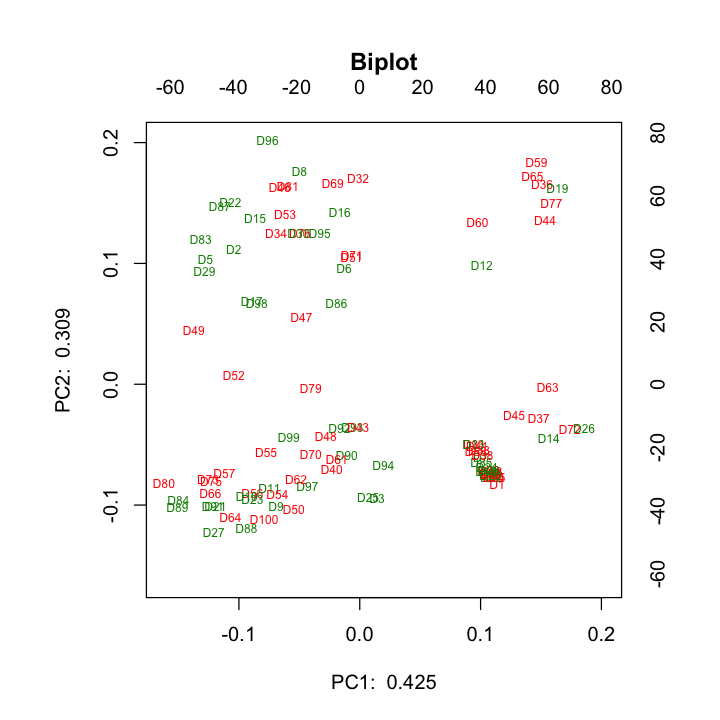

In [73]:
pcx_phylum <- phylum[[1]]
mycols_phylum <- phylum[[2]]
d.mvar_phylum <- phylum[[3]]
plot_biplot_wo_sp(pcx_phylum, mycols_phylum, d.mvar_phylum)

In [74]:
# extract eigenvalues
round(sum(pcx_phylum$sdev[1]^2)/d.mvar_phylum, 3)
round(sum(pcx_phylum$sdev[2]^2)/d.mvar_phylum, 3)
round(sum(pcx_phylum$sdev[3]^2)/d.mvar_phylum, 3)
# At phylum level, top PCs explain:
#  (0.232+0.179+0.15)*100 = 56%

[1] 0.425

[1] 0.309

[1] 0.224

### Class

In [75]:
class <- make_pca(psq, "Class")

Warning message in cmultRepl(t(otu_table(psq_rank)), method = "CZM", output = "p-counts"):
"Column no. 5 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 11 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 12 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 16 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 19 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 20 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 21 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 23 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 24 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.

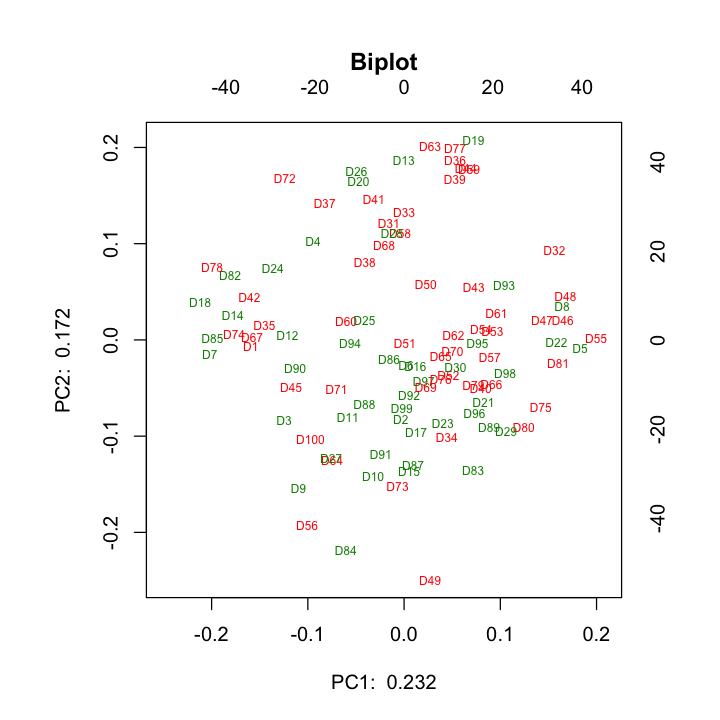

In [76]:
options(repr.plot.width=6, repr.plot.height=6)
pcx_class <- class[[1]]
mycols_class <- class[[2]]
d.mvar_class <- class[[3]]
plot_biplot_wo_sp(pcx_class, mycols_class, d.mvar_class)

In [77]:
# extract eigenvalues
round(sum(pcx_class$sdev[1]^2)/d.mvar_class, 3)
round(sum(pcx_class$sdev[2]^2)/d.mvar_class, 3)
round(sum(pcx_class$sdev[3]^2)/d.mvar_class, 3)

# At class level, PCs explain:
# PC1 and PC2 -  (0.10+0.08+0.072)*100 = 25%

[1] 0.232

[1] 0.172

[1] 0.12

### Order

In [78]:
order <- make_pca(psq, "Order")

Warning message in cmultRepl(t(otu_table(psq_rank)), method = "CZM", output = "p-counts"):
"Column no. 2 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 4 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 5 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 9 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 10 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 18 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 19 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 22 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 24 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.del

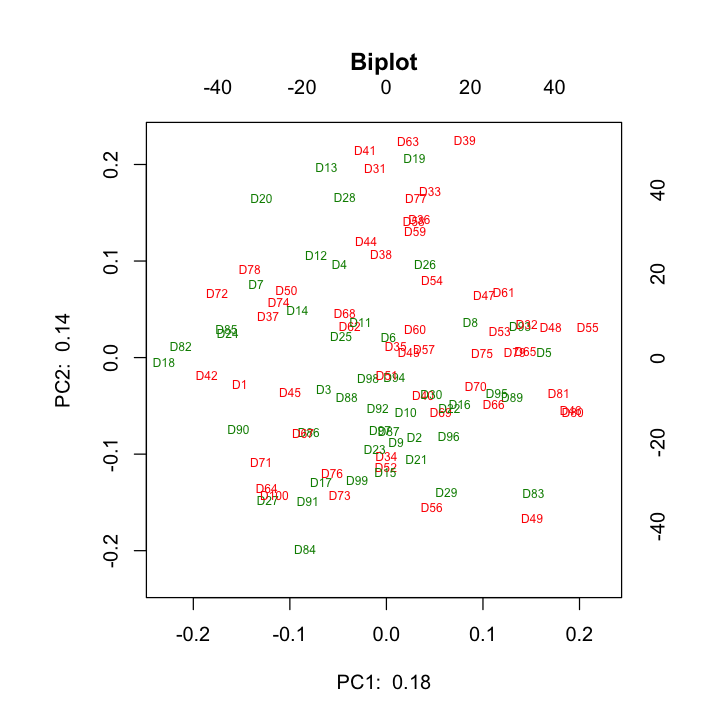

In [79]:
options(repr.plot.width=6, repr.plot.height=6)
pcx_order <- order[[1]]
mycols_order <- order[[2]]
d.mvar_order <- order[[3]]
plot_biplot_wo_sp(pcx_order, mycols_order, d.mvar_order)

In [80]:
# extract eigenvalues
round(sum(pcx_order$sdev[1]^2)/d.mvar_order, 3)
round(sum(pcx_order$sdev[2]^2)/d.mvar_order, 3)
round(sum(pcx_order$sdev[3]^2)/d.mvar_order, 3)

# At class level, PCs explain:
# PC1 and PC2 -  (0.10+0.08+0.072)*100 = 25%

# PC1 and PC2 -  0.097+0.083 = 18%

[1] 0.18

[1] 0.14

[1] 0.11

### Family

In [81]:
family <- make_pca(psq, "Family")

Warning message in cmultRepl(t(otu_table(psq_rank)), method = "CZM", output = "p-counts"):
"Column no. 2 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 4 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 5 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 6 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 7 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 13 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 17 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 18 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 19 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.dele

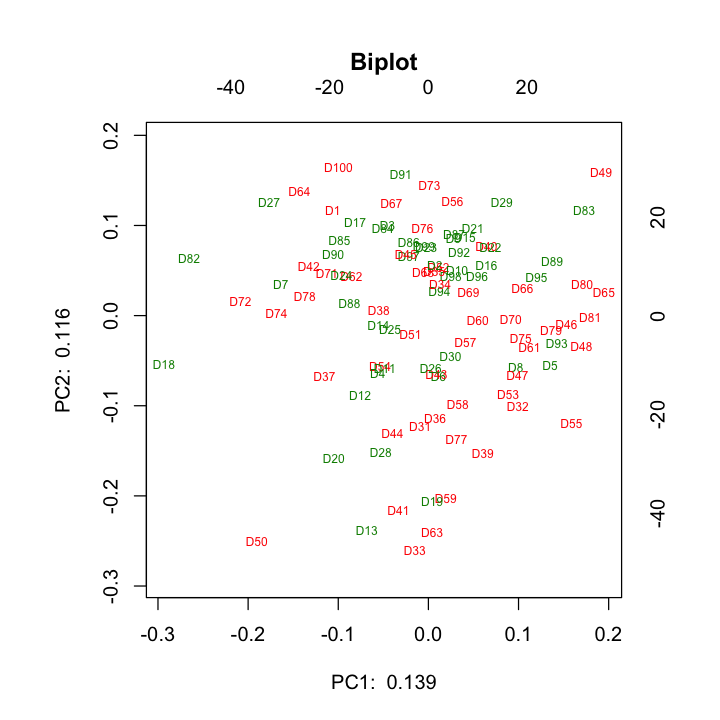

In [82]:
options(repr.plot.width=6, repr.plot.height=6)
pcx_family <- family[[1]]
mycols_family <- family[[2]]
d.mvar_family <- family[[3]]
plot_biplot_wo_sp(pcx_family, mycols_family, d.mvar_family)

In [83]:
# extract eigenvalues
round(sum(pcx_family$sdev[1]^2)/d.mvar_family, 3)
round(sum(pcx_family$sdev[2]^2)/d.mvar_family, 3)
round(sum(pcx_family$sdev[3]^2)/d.mvar_family, 3)

# At family level, PCs explain:

[1] 0.139

[1] 0.116

[1] 0.078

### Genus

In [84]:
genus <- make_pca(psq, "Genus")

Warning message in cmultRepl(t(otu_table(psq_rank)), method = "CZM", output = "p-counts"):
"Column no. 2 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 3 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 4 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 6 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 7 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 8 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 9 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 10 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 11 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete

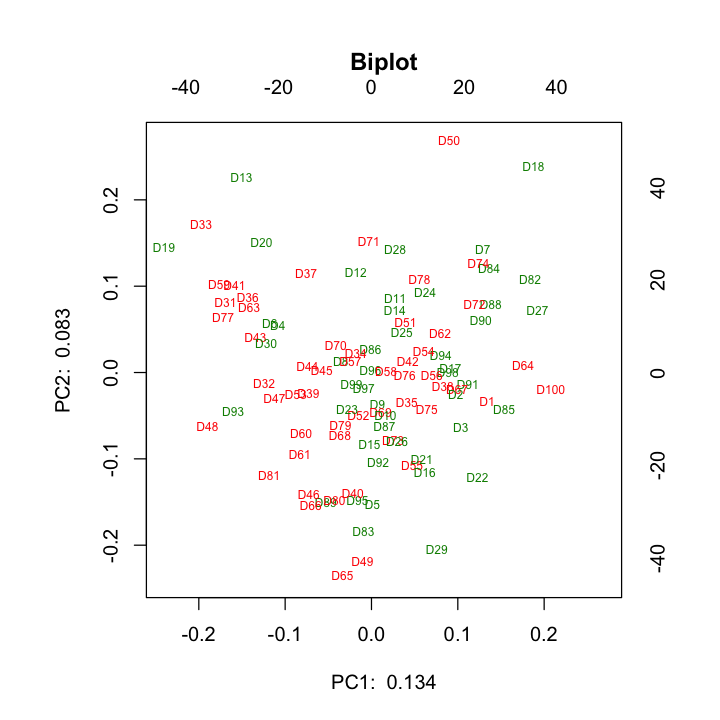

In [85]:
options(repr.plot.width=6, repr.plot.height=6)
pcx_genus <- genus[[1]]
mycols_genus <- genus[[2]]
d.mvar_genus <- genus[[3]]
plot_biplot_wo_sp(pcx_genus, mycols_genus, d.mvar_genus)

In [86]:
# extract eigenvalues
round(sum(pcx_genus$sdev[1]^2)/d.mvar_genus, 3)
round(sum(pcx_genus$sdev[2]^2)/d.mvar_genus, 3)
round(sum(pcx_genus$sdev[3]^2)/d.mvar_genus, 3)

# At class level, PCs explain:
# PC1 and PC2 -  (0.10+0.08+0.072)*100 = 25%

# PC1 and PC2 -  0.097+0.083 = 18%

[1] 0.134

[1] 0.083

[1] 0.061

### Species

In [87]:
species <- make_pca(psq, "Species")

Warning message in cmultRepl(t(otu_table(psq_rank)), method = "CZM", output = "p-counts"):
"Column no. 2 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 3 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 4 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 5 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 6 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 7 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 9 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 10 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete).
Column no. 12 containing >80% zeros/unobserved values deleted (see arguments z.warning and z.delete

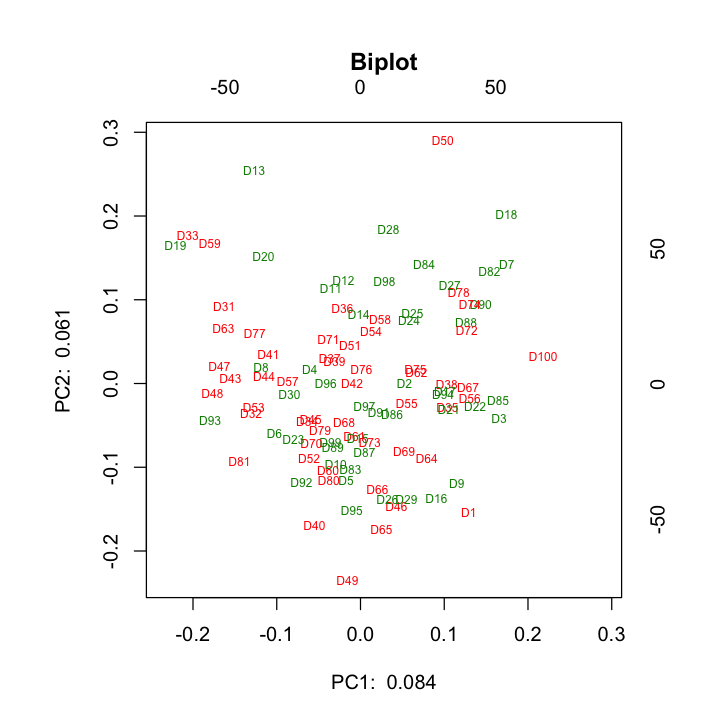

In [88]:
options(repr.plot.width=6, repr.plot.height=6)
pcx_species <- species[[1]]
mycols_species <- species[[2]]
d.mvar_species <- species[[3]]
plot_biplot_wo_sp(pcx_species, mycols_species, d.mvar_species)

In [89]:
# extract eigenvalues
round(sum(pcx_species$sdev[1]^2)/d.mvar_species, 3)
round(sum(pcx_species$sdev[2]^2)/d.mvar_species, 3)
round(sum(pcx_species$sdev[3]^2)/d.mvar_species, 3)

# At class level, PCs explain:
# PC1 and PC2 -  (0.10+0.08+0.072)*100 = 25%

# PC1 and PC2 -  0.097+0.083 = 18%

[1] 0.084

[1] 0.061

[1] 0.05